In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid

In [3]:
import os
from PIL import Image
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

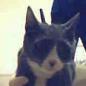

In [4]:
with Image.open('../PYTORCH_NOTEBOOKS/Data/CATS_DOGS/test/CAT/10107.jpg') as im:
    display(im)

In [5]:
path = "../PYTORCH_NOTEBOOKS/Data/CATS_DOGS/"
img_names = []

for folder,subfolders,filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)

In [6]:
len(img_names)

24994

In [7]:
img_sizes = []
rejected = []
for item in img_names:
    try: 
        with Image.open(item) as img:
            img_sizes.append(img.size)
    except:
        rejected.append(item)

In [8]:
print(len(img_sizes))
print(len(rejected))

24994
0


In [9]:
df = pd.DataFrame(img_sizes)

In [10]:
df.head()

,0,1
0,431,360
1,500,375
2,500,471
3,500,375
4,320,240


In [11]:
df[0].describe()

count    24994.000000
mean       404.493518
std        108.941802
min         42.000000
25%        323.000000
50%        448.000000
75%        500.000000
max        500.000000
Name: 0, dtype: float64

In [12]:
df[1].describe()

count    24994.000000
mean       361.037129
std         96.936811
min         33.000000
25%        302.000000
50%        375.000000
75%        421.000000
max        500.000000
Name: 1, dtype: float64

In [13]:
dog = Image.open('../PYTORCH_NOTEBOOKS/Data/CATS_DOGS/train/DOG/14.jpg')

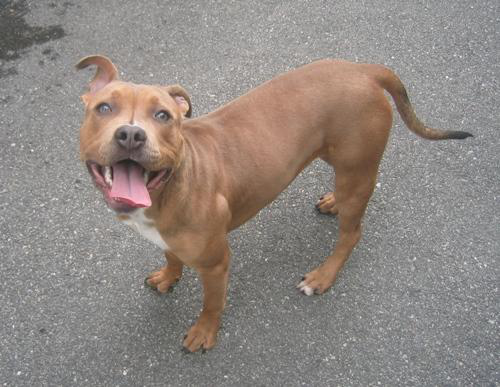

In [14]:
display(dog)

In [15]:
dog.size

(500, 387)

In [16]:
dog.getpixel((0,0))

(90, 95, 98)

In [17]:
transform = transforms.Compose([transforms.ToTensor()])

im = transform(dog)
print(type(im))
print(im.shape)

<class 'torch.Tensor'>
torch.Size([3, 387, 500])


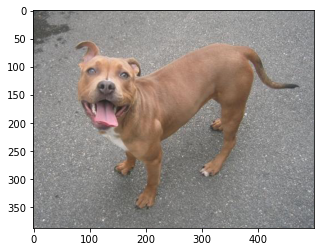

In [18]:
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

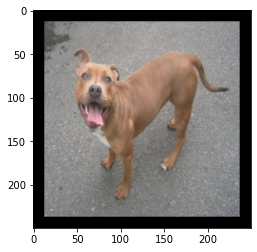

In [19]:
transform = transforms.Compose([transforms.Resize((224,224)),transforms.CenterCrop(250),transforms.ToTensor()])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

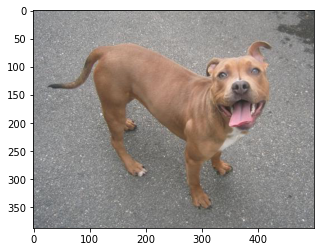

In [20]:
transform = transforms.Compose([
         transforms.RandomHorizontalFlip(p=1),
         transforms.ToTensor()])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

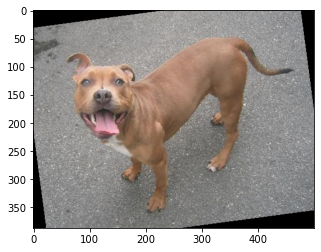

In [21]:
transform = transforms.Compose([
         transforms.RandomRotation(30),
         transforms.ToTensor()])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

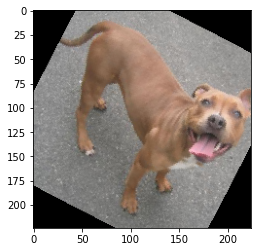

In [22]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=1),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.RandomRotation(30),
    transforms.ToTensor()])

im = transform(dog)
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [24]:
train_transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [25]:
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

In [26]:
root = '../PYTORCH_NOTEBOOKS/Data/CATS_DOGS'

train_data = datasets.ImageFolder(os.path.join(root,'train'), transform=train_transform)
test_data = datasets.ImageFolder(os.path.join(root,'test'), transform=test_transform)

In [27]:
torch.manual_seed(42)

train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10)
class_names = train_data.classes

In [28]:
class_names

['CAT', 'DOG']

In [29]:
len(train_data)

18743

In [30]:
len(test_data)

6251

In [31]:
for images,labels in train_loader:
    break

In [32]:
images.shape

torch.Size([10, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


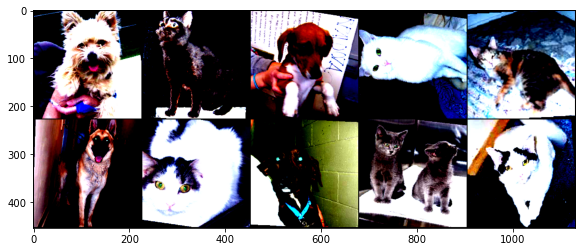

In [33]:
im = make_grid(images,nrow=5)

inv_normalize = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
        std = [1/0.229, 1/0.224, 1/0.225]
)
plt.figure(figsize=(12,4))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [34]:
class CNNCatDog(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1)
        self.conv2 = nn.Conv2d(6,16,3,1)
        self.fc1 = nn.Linear(54*54*16,120)  #(((224-2)/2-2)/2
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2)
        
    def forward(self,x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x,2,2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x,2,2)
        x = x.view(-1,54*54*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x,dim=1)

In [35]:
torch.manual_seed(101)
model = CNNCatDog()

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [37]:
model

CNNCatDog(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [38]:
for p in model.parameters():
    print(p.numel())

162
6
864
16
5598720
120
10080
84
168
2


In [39]:
import time
start_time = time.time()


epochs = 3
max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b += 1
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted==y_train).sum()
        train_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            print(f"epoch {i} loss: {loss.item()}")
            
    train_losses.append(loss)
    train_correct.append(train_corr)
    
    #TEST
    with torch.no_grad():
        for b,(X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break
                
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            batch_corr = (predicted==y_test).sum()
            test_corr = test_corr + batch_corr
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)
    
total_time = time.time() - start_time
print(f'total_time: {total_time/60} minutes')

epoch 3 loss: 0.6502822637557983
epoch 3 loss: 0.6821051836013794
epoch 3 loss: 0.5638971924781799
epoch 3 loss: 0.4729997217655182
epoch 3 loss: 0.3259182870388031
epoch 3 loss: 0.6545670628547668
epoch 3 loss: 0.5810264348983765
epoch 3 loss: 0.35047343373298645
epoch 3 loss: 0.42970338463783264
epoch 3 loss: 0.45848363637924194
epoch 3 loss: 0.5509008169174194
epoch 3 loss: 0.3736591339111328
total_time: 35.31543254852295 minutes


In [40]:
torch.save(model.state_dict(), 'cat_dog(cnn).pt')

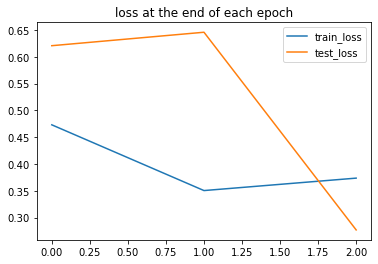

In [41]:
plt.plot(train_losses, label='train_loss')
plt.plot(test_losses, label='test_loss')
plt.title('loss at the end of each epoch')
plt.legend()

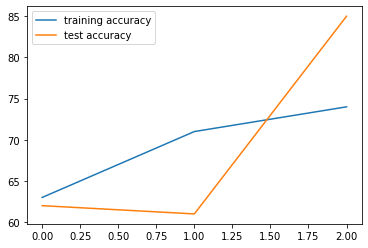

In [42]:
plt.plot([t/80 for t in train_correct], label='training accuracy')
plt.plot([t/30 for t in test_correct], label = 'test accuracy')
plt.legend()

In [43]:
AlexNet_model = models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to C:\Users\USER/.cache\torch\checkpoints\alexnet-owt-4df8aa71.pth
100.0%


In [44]:
AlexNet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [45]:
for param in AlexNet_model.parameters():
    param.requires_grad = False

In [48]:
torch.manual_seed(42)

AlexNet_model.classifier = nn.Sequential(nn.Linear(9216,1024),
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(1024,2),
                                        nn.LogSoftmax(dim=1))


In [49]:
AlexNet_model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Linear(in_features=9216, out_features=1024, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.5, 

In [50]:
for param in AlexNet_model.parameters():
    print(param.numel())

23232
64
307200
192
663552
384
884736
256
589824
256
9437184
1024
2048
2


In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(AlexNet_model.parameters(), lr = 0.001)

In [52]:
import time
start_time = time.time()


epochs = 3
max_trn_batch = 800
max_tst_batch = 300

train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    train_corr = 0
    test_corr = 0
    
    for b,(X_train,y_train) in enumerate(train_loader):
        if b == max_trn_batch:
            break
        b += 1
        y_pred = AlexNet_model(X_train)
        loss = criterion(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1]
        batch_corr = (predicted==y_train).sum()
        train_corr += batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if b%200 == 0:
            print(f"epoch {i} loss: {loss.item()}")
            
    train_losses.append(loss)
    train_correct.append(train_corr)
    
    #TEST
    with torch.no_grad():
        for b,(X_test, y_test) in enumerate(test_loader):
            if b == max_tst_batch:
                break
                
            y_val = AlexNet_model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            batch_corr = (predicted==y_test).sum()
            test_corr = test_corr + batch_corr
            
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(test_corr)
    
total_time = time.time() - start_time
print(f'total_time: {total_time/60} minutes')

epoch 0 loss: 2.8429813385009766
epoch 0 loss: 0.015282154083251953
epoch 0 loss: 0.1822231113910675
epoch 0 loss: 0.27860206365585327
epoch 1 loss: 0.06655316054821014
epoch 1 loss: 0.08002336323261261
epoch 1 loss: 0.04311438277363777
epoch 1 loss: 0.11897573620080948
epoch 2 loss: 0.1461912840604782
epoch 2 loss: 0.2390865832567215
epoch 2 loss: 0.07735295593738556
epoch 2 loss: 0.02046540006995201
total_time: 51.10327634016673 minutes


In [53]:
print(test_correct)

[tensor(2512), tensor(2724), tensor(2591)]


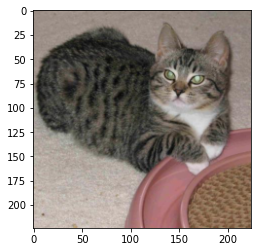

In [61]:
image_index = 2056
im = inv_normalize(test_data[image_index][0])
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [62]:
model.eval()

with torch.no_grad():
    new_pred = model(test_data[image_index][0].view(1,3,224,224)).argmax()
    
class_names[new_pred]

'CAT'

In [63]:
AlexNet_model.eval()

with torch.no_grad():
    new_pred = AlexNet_model(test_data[image_index][0].view(1,3,224,224)).argmax()
    
class_names[new_pred]

'CAT'